# Data Preprocessing and Feature Engineering

In this notbook we read in [our kaggle dataset](https://www.kaggle.com/mdabbert/ultimate-ufc-dataset), clean it, add, and remove features from it so that it is ready for further work in machine learning.

In [1]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
# read master data
df = pd.read_csv('data/ufc-master.csv')

In [3]:
# view all columns
pd.set_option('display.max_columns', None)
df.sample(5)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
2041,Robert Whittaker,Rafael Natal,-325,265,30.769231,265.000000,4/23/2016,"Las Vegas, Nevada, USA",USA,Red,False,Middleweight,MALE,3,0,4,0,41.071429,0.483571,0.5,2.571429,0.311429,4,5,39,0,0,2,5,1,1,0,9,Orthodox,182.88,193.04,185,0,4,0,49.375000,0.426250,0.000000,0.500000,0.375000,4,2,19,1,0,0,3,3,0,0,6,Orthodox,182.88,185.42,185,25,33,0,0,0,3,-3,20,-1,-2,1,0.00,7.62,-8,-8.303571,0.500000,2.071429,0,1,13.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,3.0,5:00,900.0,0.0,0.0,89.0,62.0,176.0,137.0,0.50,0.45,92.0,63.0,179.0,138.0,0.0,0.0,0.0,4.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4215,Rich Attonito,Rafael Natal,168,-195,168.000000,51.282051,9/15/2010,"Austin, Texas, USA",USA,Red,False,Middleweight,MALE,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Orthodox,182.88,193.04,185,0,1,0,24.000000,0.360000,0.000000,1.000000,0.330000,1,0,2,0,0,0,0,1,0,0,1,Orthodox,177.80,182.88,170,33,27,0,-1,-1,-1,0,-2,0,-1,0,5.08,10.16,6,-24.000000,0.000000,-1.000000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,1.0,0.0,25.0,28.0,80.0,102.0,0.31,0.27,46.0,51.0,103.0,132.0,0.0,2.0,1.0,9.0,0.0,0.22,0.0,0.0,0.0,1.0,0.0,0.0
3782,Yushin Okami,Tim Boetsch,-410,365,24.390244,365.000000,2/25/2012,"Saitama, Japan",Japan,Blue,False,Middleweight,MALE,3,0,2,0,29.000000,0.512500,0.5,1.875000,0.270000,2,3,18,0,0,0,3,2,0,0,5,Orthodox,182.88,187.96,185,1,0,0,28.846154,0.398462,0.615385,1.461538,0.392308,4,3,36,1,0,1,5,3,0,1,10,Southpaw,187.96,190.50,170,30,31,1,2,-2,-5,0,-18,-1,-2,0,-5.08,-2.54,-1,0.153846,-0.115385,0.413462,0,1,

In [4]:
# full info
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 137 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4345 non-null   object 
 1   B_fighter                     4345 non-null   object 
 2   R_odds                        4345 non-null   int64  
 3   B_odds                        4345 non-null   int64  
 4   R_ev                          4345 non-null   float64
 5   B_ev                          4345 non-null   float64
 6   date                          4345 non-null   object 
 7   location                      4345 non-null   object 
 8   country                       4345 non-null   object 
 9   Winner                        4345 non-null   object 
 10  title_bout                    4345 non-null   bool   
 11  weight_class                  4345 non-null   object 
 12  gender                        4345 non-null   object 
 13  no

In [5]:
df.shape

(4345, 137)

### Columns:
- R_fighter, B_fighter: Fighter names
- R_odds, B_odds: The American odds that the fighter will win. Usually scraped from bestfightodds.com
- R_ev, B_ev: The profit on a 100 credit winning bet
- date: The date of the fight
- location: The location of the fight
- country: The country the fight occurs in
- Winner: The winner of the fight [Red, Blue, or Draw]
- title_bout: Was this a title bout?
- weight_class: The weight class of the bout
- gender: Gender of the combatants
- no_of_rounds: The number of rounds in the fight
- B_current_lose_streak, R_current_lose_streak: Current losing streak
- B_current_win_streak, R_current_win_streak: Current winning streak
- B_draw, R_draw: Number of draws
- B_avg_SIG_STR_landed, R_avg_SIG_STR_landed : Significant Strikes Landed per minute
- B_avg_SIG_STR_pct, R_avg_SIG_STR_pct: Significant Striking Accuracy
- B_avg_SUB_ATT, R_avg_SUB_ATT: Average Submissions Attempted per 15 Minutes
- B_avg_TD_landed, R_avg_TD_landed: Average takedowns landed per 15 minutes
- B_avg_TD_pct, R_avg_TD_pct: Takedown accuracy
- B_longest_win_streak, R_longest_win_streak: Longest winning streak
- B_losses, R_losses: Total number of losses
- B_total_rounds_fought, R_total_rounds_fought: Total rounds fought
- B_total_title_bouts, R_total_title_bouts: Total number of title bouts
- B_win_by_Decision_Majority, R_win_by_Decision_Majority: Wins by Majority Decision
- B_win_by_Decision_Split, R_win_by_Decision_Split: Wins by Split Decision
- B_win_by_Decision_Unanimous, R_win_by_Decision_Unanimous: Wins by Unanimous Decision
- B_win_by_KO/TKO, R_win_by_KO/TKO: Wins by KO/TKO
- B_win_by_Submission, R_win_by_Submission: Wins by Submission
- B_win_by_TKO_Doctor_Stoppage, R_win_by_TKO_Doctor_Stoppage: Wins by Doctor Stoppage
- B_wins, R_wins: Total career wins
- B_Stance, R_stance: Fighter stance
- B_Height_cms, R_Height_cms: Fighter height in cms
- B_Reach_cms, R_Reach_cms: Fighter reach in cms
- B_Weight_lbs, R_Weight_lbs: Fighter weight in pounds
- B_age, R_age: Fighter age
- lose_streak_dif: (Blue lose streak) - (Red lose streak) winstreakdif: (Blue win streak) - (Red win streak)
- longest_win_streak_dif: (Blue longest win streak) - (Red longest win streak)
- win_dif: (Blue wins) - (Red wins)
- loss_dif: (Blue losses) - (Red losses)
- total_round_dif: (Blue total rounds fought) - (Red total rounds fought)
- total_title_bout_dif: (Blue number of title fights) - (Red number of title fights)
- ko_dif: (Blue wins by KO/TKO) - (Red wins by KO/TKO)
- sub_dif: (Blue wins by submission) - (Red wins by submission)
- height_dif: (Blue height) - (Red height) in cms
- reach_dif: (Blue reach) - (Red reach) in cms
- age_dif: (Blue age) - (Red age)
- sig_str_dif: (Blue sig strikes per minute) - (Red sig strikes per minute)
- avg_sub_att_dif: (Blue submission attempts) - (Red submission attempts)
- avg_td_dif: (Blue TD attempts) - (Red TD attempts)
- empty_arena: Did this fight occur in an empty arena? (1,0)
- constant_1: The number 1
- B_match_weightclass_rank, R_match_weightclass_rank: Rank in the weightclass this bout takes place in
- R_Women's Flyweight_rank, B_Women's Flyweight_rank: Rank in the Women's Flyweight Division
- B_Women's Featherweight_rank, 'RWomen's Featherweightrank: Rank in the Women's Featherweight Division BWomen's 
- Strawweightrank, 'R_Women's Strawweight_rank: Rank in the Women's Strawweight Division
- B_Women's Bantamweight_rank, R_Women's Bantamweight_rank: Rank in the Women's Bantamweight Division
- B_Heavyweight_rank, R_Heavyweight_rank: Heavyweight rank
- B_Light Heavyweight_rank, R_Light Heavyweight rank: Light Heavyweight rank
- B_Middleweight_rank, R_Middleweight_rank: Middleweight rank
- B_Welterweight_rank, R_Welterweight_rank: Welterweight rank
- B_Lightweight_rank, R_Lightweight_rank: Lightweight rank
- B_Featherweight_rank, R_Featherweight_rank: Featherweight rank
- B_Bantamweight_rank, R_Bantamweight_rank: Bantamweight rank
- B_Flyweight_rank, R_Flyweight_rank: Flyweight rank
- B_Pound-for-Pound_rank, R_Pound-for-Pound_rank: Pound-for-Pound rank
- better_rank: Who has the better rank (Red, Blue, neither)
- finish: How the fight finished
- finish_details: More details about the finish if available.
- finish_round: The round the fight ended
- finish_round_time: Time in the round of the finish
- total_fight_time_secs: Total time of the fight in seconds

As observed, the dataset has many columns in which many might be collinear or unuseful in other ways. We should now check for null values and take care of them first. First, we can start by checking for duplicates and discarding them.

In [6]:
# check for duplicates
df.duplicated().sum()

0

There are no duplicates, so we can move on to the null values.

In [7]:
# set max rows to show all rows
pd.set_option('display.max_rows', 500)

# check total missing values
df.isna().sum()

R_fighter                          0
B_fighter                          0
R_odds                             0
B_odds                             0
R_ev                               0
B_ev                               0
date                               0
location                           0
country                            0
Winner                             0
title_bout                         0
weight_class                       0
gender                             0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_SIG_STR_landed             930
B_avg_SIG_STR_pct                765
B_avg_SUB_ATT                    832
B_avg_TD_landed                  833
B_avg_TD_pct                     842
B_longest_win_streak               0
B_losses                           0
B_total_rounds_fought              0
B_total_title_bouts                0
B_win_by_Decision_Majority         0
B

In [8]:
# check percentage of missing values in each column
(df.isna().sum()/ df.shape[0]) *100

R_fighter                         0.000000
B_fighter                         0.000000
R_odds                            0.000000
B_odds                            0.000000
R_ev                              0.000000
B_ev                              0.000000
date                              0.000000
location                          0.000000
country                           0.000000
Winner                            0.000000
title_bout                        0.000000
weight_class                      0.000000
gender                            0.000000
no_of_rounds                      0.000000
B_current_lose_streak             0.000000
B_current_win_streak              0.000000
B_draw                            0.000000
B_avg_SIG_STR_landed             21.403913
B_avg_SIG_STR_pct                17.606444
B_avg_SUB_ATT                    19.148446
B_avg_TD_landed                  19.171461
B_avg_TD_pct                     19.378596
B_longest_win_streak              0.000000
B_losses   

We can see that some columns such as `avg_SIG_STR_landed`, `avg_SIG_STR_pct`, `avg_SUB_ATT`, `avg_TD_landed`, `avg_TD_pct`, `finish`, `finish_round`, `finish_round_time` and `total_fight_time_secs` have reasonable null percentages, should be preferrably imputed. Other columns such as `Women's Flyweight_rank` for both red and blue sides have more than 95% of their values missing. For these columns removing them from our dataset would probably be the best choice to avoid bias and preserve data. Also, it is also impossible to have a value for all rows in these columns. For example, it would be meaningless to have a value for the `Women's Flyweight_rank` in men's matches.

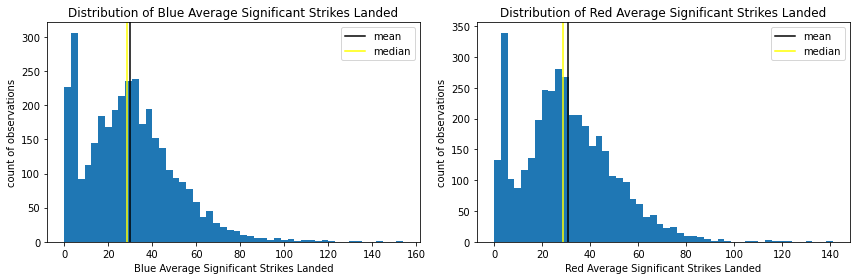

In [9]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_SIG_STR_landed'], bins = 50)
plt.axvline(df['B_avg_SIG_STR_landed'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_SIG_STR_landed'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Significant Strikes Landed')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Blue Average Significant Strikes Landed')

plt.subplot(1,2,2)
plt.hist(df['R_avg_SIG_STR_landed'], bins = 50)
plt.axvline(df['R_avg_SIG_STR_landed'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_SIG_STR_landed'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Significant Strikes Landed')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Significant Strikes Landed')

plt.tight_layout()
plt.show()

We can see that the average and median are almost the same, which makes sense, because the red and blue corners do not mean anything and are chosen at random, so the fighter's ability is irrelevant to the corner they are in. It can also be seen that there seems to be 2 different distributions here, one normal looking distribution, and another peak in the beginning. The normal one is for fights that have gone to distance, which is most fights. The peak in the beginning are most likely earlty knockouts or submissions in the first round. The others are normal fights with 3 to 5 rounds. 

Let's test this hypothesis before making any decisions.

In [10]:
# getting the mean finish round for fights with low significant strikes landed
df[['finish_round']].loc[df['B_avg_SIG_STR_landed'] < 10].squeeze().mean()

2.413005272407733

It seems that our assumption was wrong, which makes sense since this is an average per minute value and not the total in the fight. A good reason for the initial peak could be a fighter's fighting style. Many grapplers do not make many significant strikes. 

Text(0, 0.5, 'Mean Takedowns Landed')

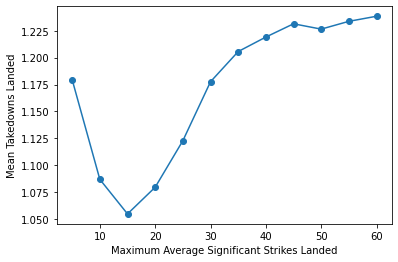

In [11]:
# getting the mean take-down landed for fights with low significant strikes landed
mean_td = []
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]:
    x= df[['B_avg_TD_landed']].loc[df['B_avg_SIG_STR_landed'] < i].squeeze().mean()
    mean_td.append(x)

plt.plot([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], mean_td ,marker = 'o')
plt.xlabel('Maximum Average Significant Strikes Landed')
plt.ylabel('Mean Takedowns Landed')

This result does not really help us make a wiser decision either.Perhaps we will later make more sense of this separate peak in the beginning through unsupervised learning. In this case it would be a good idea to replace NaNs with the average, since most values are not missing and mean seems to be at the highest point of the main curve.

In [12]:
# set NaNs to mean
df['B_avg_SIG_STR_landed'].fillna(df['B_avg_SIG_STR_landed'].mean(), inplace = True)

#check
df['B_avg_SIG_STR_landed']

0        3.600000
1        4.300000
2        3.630000
3        2.870000
4        6.200000
          ...    
4340    29.938082
4341    29.938082
4342     8.000000
4343    29.938082
4344    31.666667
Name: B_avg_SIG_STR_landed, Length: 4345, dtype: float64

In [13]:
# set NaNs to mean
df['R_avg_SIG_STR_landed'].fillna(df['R_avg_SIG_STR_landed'].mean(), inplace = True)

#check
df['R_avg_SIG_STR_landed']

0        5.290000
1        2.390000
2        3.840000
3        8.600000
4        6.550000
          ...    
4340    13.666667
4341    18.000000
4342    12.000000
4343    40.500000
4344    15.666667
Name: R_avg_SIG_STR_landed, Length: 4345, dtype: float64

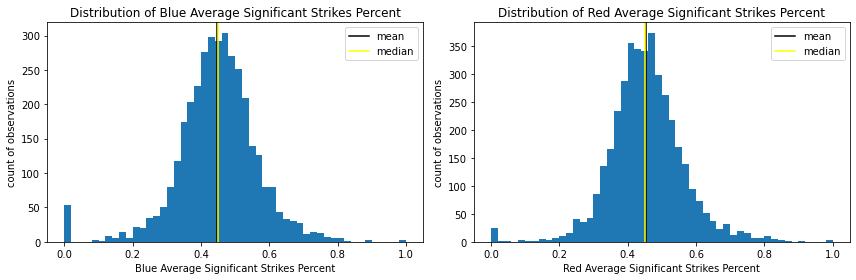

In [14]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_SIG_STR_pct'], bins = 50)
plt.axvline(df['B_avg_SIG_STR_pct'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_SIG_STR_pct'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Significant Strikes Percent')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Blue Average Significant Strikes Percent')

plt.subplot(1,2,2)
plt.hist(df['R_avg_SIG_STR_pct'], bins = 50)
plt.axvline(df['R_avg_SIG_STR_pct'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_SIG_STR_pct'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Significant Strikes Percent')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Significant Strikes Percent')

plt.tight_layout()
plt.show()

This histogram is basically what every data scientist dreams of when they have got a new data set! The distribution is very normal and here we can confidently replace our Nulls with the mean or the median. Lets choose the median this time.

In [15]:
# set NaNs to median
df['R_avg_SIG_STR_pct'].fillna(df['R_avg_SIG_STR_pct'].median(), inplace = True)

#check
df['R_avg_SIG_STR_pct']

0       0.420000
1       0.390000
2       0.510000
3       0.480000
4       0.640000
          ...   
4340    0.576667
4341    0.550000
4342    0.250000
4343    0.405000
4344    0.588333
Name: R_avg_SIG_STR_pct, Length: 4345, dtype: float64

In [16]:
# set NaNs to median
df['B_avg_SIG_STR_pct'].fillna(df['B_avg_SIG_STR_pct'].median(), inplace = True)

#check
df['B_avg_SIG_STR_pct']

0       0.40
1       0.52
2       0.34
3       0.36
4       0.45
        ... 
4340    0.45
4341    0.45
4342    0.34
4343    0.45
4344    0.46
Name: B_avg_SIG_STR_pct, Length: 4345, dtype: float64

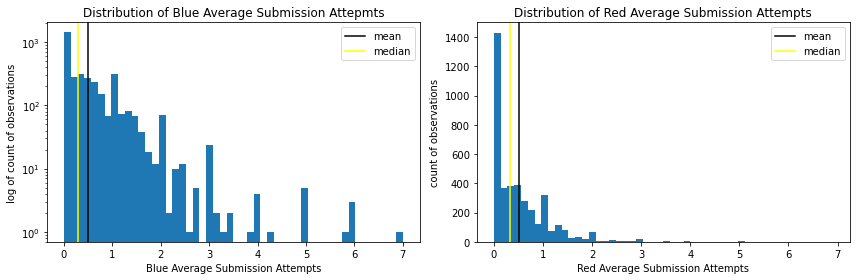

In [17]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_SUB_ATT'], bins = 50)
plt.axvline(df['B_avg_SUB_ATT'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_SUB_ATT'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Submission Attempts')
plt.yscale('log')
plt.ylabel('log of count of observations')
plt.legend()
plt.title('Distribution of Blue Average Submission Attepmts')

plt.subplot(1,2,2)
plt.hist(df['R_avg_SUB_ATT'], bins = 50)
plt.axvline(df['R_avg_SUB_ATT'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_SUB_ATT'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Submission Attempts')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Submission Attempts')

plt.tight_layout()
plt.show()

In [18]:
# check how much of the total values are 0
df['B_avg_SUB_ATT'].loc[df['B_avg_SUB_ATT'] == 0].count() / df['B_avg_SUB_ATT'].count()

0.3808710503842869

For this feature, nearly 40% of the total values are 0, meaning that most fighters did not attempt any submissions within the fight. The best choices to fill the value would either be 0 or the median which is closer to 0 than the mean. Lets also check takedowns landed to see if there are any similar patterns.

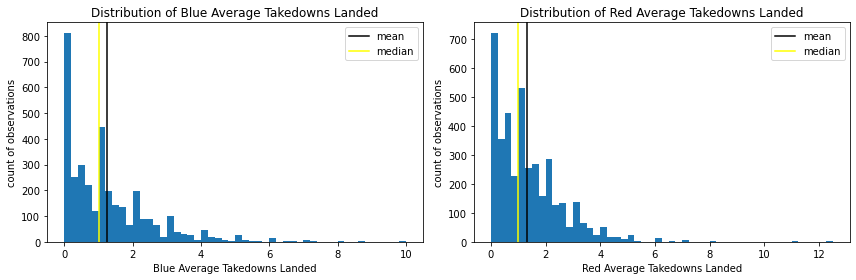

In [19]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_TD_landed'], bins = 50)
plt.axvline(df['B_avg_TD_landed'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_TD_landed'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Takedowns Landed')
#plt.yscale('log')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Blue Average Takedowns Landed')

plt.subplot(1,2,2)
plt.hist(df['R_avg_TD_landed'], bins = 50)
plt.axvline(df['R_avg_TD_landed'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_TD_landed'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Takedowns Landed')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Takedowns Landed')

plt.tight_layout()
plt.show()

In [20]:
# check how much of the total values are 0
df['B_avg_TD_landed'].loc[df['B_avg_TD_landed'] == 0].count() / df['B_avg_TD_landed'].count()

0.21212984054669703

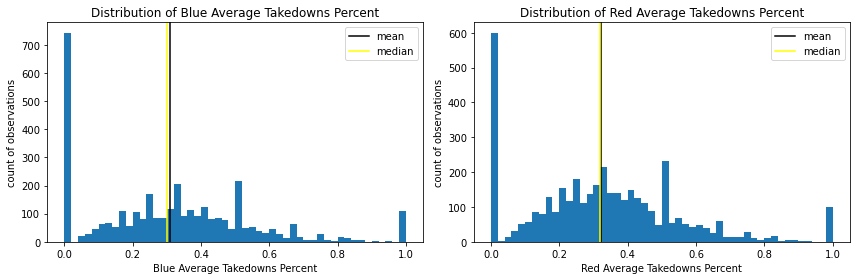

In [21]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check
plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.hist(df['B_avg_TD_pct'], bins = 50)
plt.axvline(df['B_avg_TD_pct'].mean(), color = 'black', label = 'mean')
plt.axvline(df['B_avg_TD_pct'].median(), color = 'yellow', label = 'median')
plt.xlabel('Blue Average Takedowns Percent')
#plt.yscale('log')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Blue Average Takedowns Percent')

plt.subplot(1,2,2)
plt.hist(df['R_avg_TD_pct'], bins = 50)
plt.axvline(df['R_avg_TD_pct'].mean(), color = 'black', label = 'mean')
plt.axvline(df['R_avg_TD_pct'].median(), color = 'yellow', label = 'median')
plt.xlabel('Red Average Takedowns Percent')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Red Average Takedowns Percent')

plt.tight_layout()
plt.show()

In [22]:
# check how much of the total values are 0
df['B_avg_TD_pct'].loc[df['B_avg_TD_pct'] == 0].count() / df['B_avg_TD_pct'].count()

0.21210391093348557

As predicted, 0 takedowns are very common too especially with strikers. However, submissions are more rare. Luckily we have a column `win_by_Submission` for both red and blue corners. We can replace NaN's for all three features with 0 unless their `win_by_Submission` is more than or equal to 1, in which case we will use the mean to fill the values. This is because there are not a lot of fighters with submission wins overall, so if a fighter does have a win by submission in their record we will asume that they are a decent grappler and occasionally attempt takedowns and submissions. Unfortunately this is the best guess we can make. We are assuming fighter with no submission wins would rather fight on their feet than attempt takedowns or submissions.

In [23]:
# conditionally set NaNs to median
df['B_avg_SUB_ATT'] = df.apply(
    lambda row: df['B_avg_SUB_ATT'].median() if (np.isnan(row['B_avg_SUB_ATT'])) & (row['B_win_by_Submission'] >= 1) else row['B_avg_SUB_ATT'],
    axis = 1
)

#set remaining NaNs to 0
df['B_avg_SUB_ATT'].fillna(0, inplace = True)

#check
df['B_avg_SUB_ATT']

0       0.300000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
4340    0.000000
4341    0.000000
4342    1.000000
4343    0.000000
4344    0.666667
Name: B_avg_SUB_ATT, Length: 4345, dtype: float64

In [24]:
# conditionally set NaNs to median
df['R_avg_SUB_ATT'] = df.apply(
    lambda row: df['R_avg_SUB_ATT'].median() if (np.isnan(row['R_avg_SUB_ATT'])) & (row['R_win_by_Submission'] >= 1) else row['R_avg_SUB_ATT'],
    axis = 1
)

#set remaining NaNs to 0
df['R_avg_SUB_ATT'].fillna(0, inplace = True)

#check
df['R_avg_SUB_ATT']

0       1.100000
1       0.000000
2       0.800000
3       0.400000
4       1.300000
          ...   
4340    0.000000
4341    1.000000
4342    0.000000
4343    0.000000
4344    1.333333
Name: R_avg_SUB_ATT, Length: 4345, dtype: float64

In [25]:
# conditionally set NaNs to median
df['B_avg_TD_landed'] = df.apply(
    lambda row: df['B_avg_TD_landed'].median() if (np.isnan(row['B_avg_TD_landed'])) & (row['B_win_by_Submission'] >= 1) else row['B_avg_TD_landed'],
    axis = 1
)

#set remaining NaNs to 0
df['B_avg_TD_landed'].fillna(0, inplace = True)

#check
df['B_avg_TD_landed']

0       2.340000
1       0.000000
2       0.390000
3       0.360000
4       0.000000
          ...   
4340    0.000000
4341    0.000000
4342    1.000000
4343    0.000000
4344    1.666667
Name: B_avg_TD_landed, Length: 4345, dtype: float64

In [26]:
# conditionally set NaNs to median
df['R_avg_TD_landed'] = df.apply(
    lambda row: df['R_avg_TD_landed'].median() if (np.isnan(row['R_avg_TD_landed'])) & (row['R_win_by_Submission'] >= 1) else row['R_avg_TD_landed'],
    axis = 1
)

#set remaining NaNs to 0
df['R_avg_TD_landed'].fillna(0, inplace = True)

#check
df['R_avg_TD_landed']

0       0.920000
1       0.000000
2       0.000000
3       1.940000
4       2.590000
          ...   
4340    0.000000
4341    4.666667
4342    0.000000
4343    3.500000
4344    0.833333
Name: R_avg_TD_landed, Length: 4345, dtype: float64

In [27]:
# conditionally set NaNs to median
df['B_avg_TD_pct'] = df.apply(
    lambda row: df['B_avg_TD_pct'].median() if (np.isnan(row['B_avg_TD_pct'])) & (row['B_win_by_Submission'] >= 1) else row['B_avg_TD_pct'],
    axis = 1
)

#set remaining NaNs to 0
df['B_avg_TD_pct'].fillna(0, inplace = True)

#check
df['B_avg_TD_pct']

0       0.31
1       0.00
2       0.25
3       1.00
4       0.00
        ... 
4340    0.00
4341    0.00
4342    1.00
4343    0.00
4344    0.50
Name: B_avg_TD_pct, Length: 4345, dtype: float64

In [28]:
# conditionally set NaNs to median
df['R_avg_TD_pct'] = df.apply(
    lambda row: df['R_avg_TD_pct'].median() if (np.isnan(row['R_avg_TD_pct'])) & (row['R_win_by_Submission'] >= 1) else row['R_avg_TD_pct'],
    axis = 1
)

#set remaining NaNs to 0
df['R_avg_TD_pct'].fillna(0, inplace = True)

#check
df['R_avg_TD_pct']

0       0.210
1       0.000
2       0.000
3       0.830
4       1.000
        ...  
4340    0.000
4341    0.790
4342    0.000
4343    0.520
4344    0.145
Name: R_avg_TD_pct, Length: 4345, dtype: float64

In [29]:
# Check our updated dataset so far
(df.isna().sum()/ df.shape[0]) *100

R_fighter                         0.000000
B_fighter                         0.000000
R_odds                            0.000000
B_odds                            0.000000
R_ev                              0.000000
B_ev                              0.000000
date                              0.000000
location                          0.000000
country                           0.000000
Winner                            0.000000
title_bout                        0.000000
weight_class                      0.000000
gender                            0.000000
no_of_rounds                      0.000000
B_current_lose_streak             0.000000
B_current_win_streak              0.000000
B_draw                            0.000000
B_avg_SIG_STR_landed              0.000000
B_avg_SIG_STR_pct                 0.000000
B_avg_SUB_ATT                     0.000000
B_avg_TD_landed                   0.000000
B_avg_TD_pct                      0.000000
B_longest_win_streak              0.000000
B_losses   

The changes have been made successfully! Next, we can see that there are a number of `rank` colums all of which have more than 97% of their values missing except for two with 82% and 73%  Null values! Rankings can help a lot in predicting fight outcomes, however we fortunately do have the `better_rank` feature. However, here there are too many rows missing, and average or median or 0 ranking fillings make absolutely no sense. Thus, we have no other easy way out but to discard all of these columns.

In [30]:
df.drop(['B_match_weightclass_rank', 'R_match_weightclass_rank', "R_Women's Flyweight_rank", "R_Women's Featherweight_rank",
        "R_Women's Strawweight_rank", "R_Women's Bantamweight_rank", "R_Heavyweight_rank", "R_Light Heavyweight_rank",
        "R_Middleweight_rank", "R_Welterweight_rank", "R_Lightweight_rank", "R_Featherweight_rank",
        "R_Bantamweight_rank", "R_Flyweight_rank", "R_Pound-for-Pound_rank",
        "B_Women's Flyweight_rank", "B_Women's Featherweight_rank",
        "B_Women's Strawweight_rank", "B_Women's Bantamweight_rank", "B_Heavyweight_rank", "B_Light Heavyweight_rank",
        "B_Middleweight_rank", "B_Welterweight_rank", "B_Lightweight_rank", "B_Featherweight_rank",
        "B_Bantamweight_rank", "B_Flyweight_rank", "B_Pound-for-Pound_rank"], axis=1, inplace = True)

# check
(df.isna().sum()/ df.shape[0]) *100

R_fighter                        0.000000
B_fighter                        0.000000
R_odds                           0.000000
B_odds                           0.000000
R_ev                             0.000000
B_ev                             0.000000
date                             0.000000
location                         0.000000
country                          0.000000
Winner                           0.000000
title_bout                       0.000000
weight_class                     0.000000
gender                           0.000000
no_of_rounds                     0.000000
B_current_lose_streak            0.000000
B_current_win_streak             0.000000
B_draw                           0.000000
B_avg_SIG_STR_landed             0.000000
B_avg_SIG_STR_pct                0.000000
B_avg_SUB_ATT                    0.000000
B_avg_TD_landed                  0.000000
B_avg_TD_pct                     0.000000
B_longest_win_streak             0.000000
B_losses                         0

In [31]:
df['finish'].value_counts()

U-DEC         1559
KO/TKO        1307
SUB            764
S-DEC          438
M-DEC           26
DQ              12
Overturned       2
Name: finish, dtype: int64

We only have 7 values in the `finish` column so we can transform them to dummy variables. This will automatically put 0 in all columns for Null values. This means that we can keep all our dummy columns without needing to drop any, so outcomes with all columns being 0 are unknown.

In [32]:
# get dummies
finish_dummies = pd.get_dummies(df['finish'], prefix = 'finish')

#check
finish_dummies

,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
4340,0,1,0,0,0,0,0
4341,0,1,0,0,0,0,0
4342,0,1,0,0,0,0,0
4343,0,0,0,0,0,0,1


In [33]:
# concatenate
df = pd.concat([df, finish_dummies], axis=1)

In [34]:
# drop finish
df.drop(["finish"], axis=1, inplace = True)

# check
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC
0,Pedro Munhoz,Frankie Edgar,-278,225,35.971223,225.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Bantamweight,MALE,5,2,0,1,3.600000,0.40,0.300000,2.340000,0.31,5,8,89,9,0,0,10,5,2,0,17,Orthodox,167.64,172.72,135,1,0,0,5.290000,0.420000,1.100000,0.920000,0.210,4,4,26,0,0,0,2,3,3,0,8,Orthodox,167.64,165.10,135,33,38,1,0,1,9,4,63,9,2,-1,0.00,7.62,5,-1.690000,-0.800000,1.420000,1,1,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0
1,Marcin Prachnio,Mike Rodriguez,188,-240,188.000000,41.666667,8/22/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Light Heavyweight,MALE,3,1,0,0,4.300000,0.52,0.000000,0.000000,0.00,1,2,8,0,0,0,0,1,0,0,1,Southpaw,193.04,208.28,205,2,0,0,2.390000,0.390000,0.000000,0.000000,0.000,0,2,2,0,0,0,0,0,0,0,0,Orthodox,190.50,187.96,205,32,31,-1,0,1,1,0,6,0,1,0,2.54,20.32,-1,1.910000,0.000000,0.000000,1,1,neither,Elbow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
2,Mariya Agapova,Shana Dobson,-1430,750,6.993007,750.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Flyweight,FEMALE,3,3,0,0,3.630000,0.34,0.000000,0.390000,0.25,1,3,9,0,0,0,0,1,0,0,1,Orthodox,167.64,175.26,125,0,1,0,3.840000,0.510000,0.800000,0.000000,0.000,1,0,1,0,0,0,0,0,1,0,1,Southpaw,167.64,172.72,125,23,31,3,-1,0,0,3,8,0,1,-1,0.00,2.54,8,-0.210000,-0.800000,0.390000,1,1,neither,Punches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
3,Daniel Rodriguez,Dwight Grant,-230,180,43.478261,180.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,2,0,2.870000,0.36,0.000000,0.360000,1.00,2,1,7,0,0,1,0,1,0,0,2,Switch,185.42,193.04,170,0,2,0,8.600000,0.480000,0.400000,1.940000,0.830,2,0,5,0,0,0,1,0,1,0,2,Southpaw,185.42,187.96,170,33,35,0,0,0,0,1,2,0,1,-1,0.00,5.08,2,-5.730000,-0.400000,-1.580000,1,1,neither,Punches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
4,Amanda Lemos,Mizuki Inoue,110,-137,110.000000,72.992701,8/22/2020,"Las Vegas, Nevada, USA",USA,Red,False,Women's Strawweight,F

`finish_round` and `finish_round_time` are redundant columns since the `total_fight_time_secs` explains both of them since all rounds are always 5 minutes. Thus, we can drop those 2 columns. The `finish_details` column also has 53% of values missing which are string types. I will drop these columns, since I am not interested in predicting the details of any finish, so the information in that column is irrelevant to my work. All other columns with `bout` at the end of their name will also be dropped. They all have 36% of their values missing, and they are irrelevant in my work too. They are the details of the fight itself which should be used for predictions, and I am not interested in predicting them using my other variables either.

In [35]:
# drop
df.drop(["finish_details", "finish_round", "finish_round_time", 
        "R_kd_bout", "R_sig_str_landed_bout", "R_sig_str_attempted_bout", "R_sig_str_pct_bout", 
        "R_tot_str_landed_bout", "R_tot_str_attempted_bout", "R_td_landed_bout", "R_td_attempted_bout",
        "R_td_pct_bout", "R_sub_attempts_bout", "R_pass_bout", "R_rev_bout",
        "B_kd_bout", "B_sig_str_landed_bout", "B_sig_str_attempted_bout", "B_sig_str_pct_bout", 
        "B_tot_str_landed_bout", "B_tot_str_attempted_bout", "B_td_landed_bout", "B_td_attempted_bout",
        "B_td_pct_bout", "B_sub_attempts_bout", "B_pass_bout", "B_rev_bout"], axis=1, inplace = True)

In [36]:
#check
(df.isna().sum()/ df.shape[0]) *100

R_fighter                       0.00000
B_fighter                       0.00000
R_odds                          0.00000
B_odds                          0.00000
R_ev                            0.00000
B_ev                            0.00000
date                            0.00000
location                        0.00000
country                         0.00000
Winner                          0.00000
title_bout                      0.00000
weight_class                    0.00000
gender                          0.00000
no_of_rounds                    0.00000
B_current_lose_streak           0.00000
B_current_win_streak            0.00000
B_draw                          0.00000
B_avg_SIG_STR_landed            0.00000
B_avg_SIG_STR_pct               0.00000
B_avg_SUB_ATT                   0.00000
B_avg_TD_landed                 0.00000
B_avg_TD_pct                    0.00000
B_longest_win_streak            0.00000
B_losses                        0.00000
B_total_rounds_fought           0.00000


Lastly, lets take care of our last column with NaN values, `total_fight_time_secs`.

Text(0.5, 1.0, 'Distribution of Time Finished')

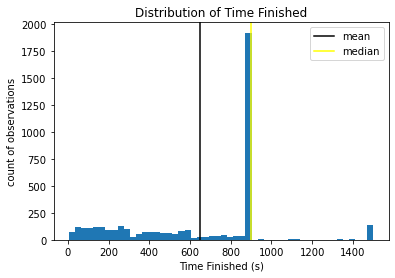

In [37]:
# plot histogram to look at the distribution of the feature
# plot the median and mean lines to check

plt.figure()
plt.hist(df['total_fight_time_secs'], bins = 50)
plt.axvline(df['total_fight_time_secs'].mean(), color = 'black', label = 'mean')
plt.axvline(df['total_fight_time_secs'].median(), color = 'yellow', label = 'median')
plt.xlabel('Time Finished (s)')
plt.ylabel('count of observations')
plt.legend()
plt.title('Distribution of Time Finished')

Here we see that most fights have a length of 900 seconds, which makes complete sense. All non-title bouts are 15 minutes and the majority of them go to the decision (not KO/TKO or submissions, etc) which is 900 seconds. Therefore, it would be best to just replace the NaNs with the median if the fight was ended by decision, and replace with average otherwise.

In [38]:
# conditionally set NaNs to median
df['total_fight_time_secs'] = df.apply(
    lambda row: df['total_fight_time_secs'].median() if (np.isnan(row['total_fight_time_secs'])) & (row['finish_DQ'] == 0) & (row['finish_KO/TKO'] == 0) & (row['finish_SUB'] == 0) & (row['finish_Overturned'] == 0) else row['total_fight_time_secs'],
    axis = 1
)
#set remaining NaNs to mean
df['total_fight_time_secs'].fillna(df['total_fight_time_secs'].mean(), inplace = True)

#check
df['total_fight_time_secs']

0       900.000000
1       665.128519
2       665.128519
3       665.128519
4       900.000000
           ...    
4340     44.000000
4341    121.000000
4342     47.000000
4343    900.000000
4344    900.000000
Name: total_fight_time_secs, Length: 4345, dtype: float64

In [39]:
#check
# full info
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4345 non-null   object 
 1   B_fighter                     4345 non-null   object 
 2   R_odds                        4345 non-null   int64  
 3   B_odds                        4345 non-null   int64  
 4   R_ev                          4345 non-null   float64
 5   B_ev                          4345 non-null   float64
 6   date                          4345 non-null   object 
 7   location                      4345 non-null   object 
 8   country                       4345 non-null   object 
 9   Winner                        4345 non-null   object 
 10  title_bout                    4345 non-null   bool   
 11  weight_class                  4345 non-null   object 
 12  gender                        4345 non-null   object 
 13  no_

### No More Nulls:
We have now reached the point where we no longer have any missing values. Lets now explore the columns. To use machine learning models we need to make sure all of our columns are numeric. ***Starting from the top the `R_fighter` and `B_fighter` columns are strings with the fighters names. These column are not needed since the fighters' statistics is explained in other columns such as 'reach' or 'height', so they are redundant. Also, there are a large number of fighters so turning it into dummy variables wouldn't make a lot of sense.*** First, lets transform the `Winner` column to `winner_is_blue` and have the values be 1s and 0s.

In [40]:
# dropping the columns
#df.drop(["R_fighter", ""], axis=1, inplace = True)

In [41]:
# transform the `Winner column to 1s and 0s
df['Winner'] = df['Winner'].map({'Blue': 1, 'Red': 0})

# changing the column name
df.rename(columns={"Winner": "winner_is_blue"}, inplace =True)

df['winner_is_blue']

0       1
1       1
2       1
3       0
4       0
       ..
4340    1
4341    0
4342    0
4343    0
4344    1
Name: winner_is_blue, Length: 4345, dtype: int64

Next, lets transform the `gender` column to `is_male` again with numeric boolean values.

In [42]:
# transform the gender column to 1s and 0s
df['gender'] = df['gender'].map({'MALE': 1, 'FEMALE': 0})

# changing the column name
df.rename(columns={"gender": "is_male"}, inplace =True)

df['is_male']

0       1
1       1
2       0
3       1
4       0
       ..
4340    1
4341    1
4342    1
4343    1
4344    1
Name: is_male, Length: 4345, dtype: int64

We should next make the booleans in the `title_bout` column numeric values.

In [43]:
# transform the title_bout column to 1s and 0s
df['title_bout']  = df['title_bout'].map({True: 1, False: 0})

# changing the column name
df.rename(columns={"title_bout": "is_title_bout"}, inplace =True)

df['is_title_bout']

0       0
1       0
2       0
3       0
4       0
       ..
4340    0
4341    0
4342    0
4343    0
4344    0
Name: is_title_bout, Length: 4345, dtype: int64

In [44]:
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,winner_is_blue,is_title_bout,weight_class,is_male,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC
0,Pedro Munhoz,Frankie Edgar,-278,225,35.971223,225.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,1,0,Bantamweight,1,5,2,0,1,3.600000,0.40,0.300000,2.340000,0.31,5,8,89,9,0,0,10,5,2,0,17,Orthodox,167.64,172.72,135,1,0,0,5.290000,0.420000,1.100000,0.920000,0.210,4,4,26,0,0,0,2,3,3,0,8,Orthodox,167.64,165.10,135,33,38,1,0,1,9,4,63,9,2,-1,0.00,7.62,5,-1.690000,-0.800000,1.420000,1,1,Red,900.000000,0,0,0,0,1,0,0
1,Marcin Prachnio,Mike Rodriguez,188,-240,188.000000,41.666667,8/22/2020,"Las Vegas, Nevada, USA",USA,1,0,Light Heavyweight,1,3,1,0,0,4.300000,0.52,0.000000,0.000000,0.00,1,2,8,0,0,0,0,1,0,0,1,Southpaw,193.04,208.28,205,2,0,0,2.390000,0.390000,0.000000,0.000000,0.000,0,2,2,0,0,0,0,0,0,0,0,Orthodox,190.50,187.96,205,32,31,-1,0,1,1,0,6,0,1,0,2.54,20.32,-1,1.910000,0.000000,0.000000,1,1,neither,665.128519,0,1,0,0,0,0,0
2,Mariya Agapova,Shana Dobson,-1430,750,6.993007,750.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,1,0,Women's Flyweight,0,3,3,0,0,3.630000,0.34,0.000000,0.390000,0.25,1,3,9,0,0,0,0,1,0,0,1,Orthodox,167.64,175.26,125,0,1,0,3.840000,0.510000,0.800000,0.000000,0.000,1,0,1,0,0,0,0,0,1,0,1,Southpaw,167.64,172.72,125,23,31,3,-1,0,0,3,8,0,1,-1,0.00,2.54,8,-0.210000,-0.800000,0.390000,1,1,neither,665.128519,0,1,0,0,0,0,0
3,Daniel Rodriguez,Dwight Grant,-230,180,43.478261,180.000000,8/22/2020,"Las Vegas, Nevada, USA",USA,0,0,Welterweight,1,3,0,2,0,2.870000,0.36,0.000000,0.360000,1.00,2,1,7,0,0,1,0,1,0,0,2,Switch,185.42,193.04,170,0,2,0,8.600000,0.480000,0.400000,1.940000,0.830,2,0,5,0,0,0,1,0,1,0,2,Southpaw,185.42,187.96,170,33,35,0,0,0,0,1,2,0,1,-1,0.00,5.08,2,-5.730000,-0.400000,-1.580000,1,1,neither,665.128519,0,1,0,0,0,0,0
4,Amanda Lemos,Mizuki Inoue,110,-137,110.000000,72.992701,8/22/2020,"Las Vegas, Nevada, USA",USA,0,0,Women's Strawweight,0,3,0,1,0,6.200000,0.45,0.000000,0.000000,0.00,1,0,3,0,0,1,0,0,0,0,1,Orthodox,160.02,165.10,125,0,1,0,6.550000,0.640000,1.300000,2.590000,1.000,1,1,3,0,0,0,0,0,1,0,1,Southpaw,162.56,165.10,135,33,26,0,0,0,0,-1,0,0,0,-1,-2.54,0.00,-7,-0.350000,-1.300000,-2.590000,1,1,neither,900.000000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Duane Ludwig,Darren Elkins,-155,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,1,0,Lightweight,1,3,0,0,0,29.938082,0.45,0.000000,0.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,177.80,180.34,145,1,0,0,13.666667,0.576667,0.000000,0.000000,0.000,2,1,5,0,

Lets now take care of the date column. We can keep it since it might show some unknown patterns and help our model. We must first make it a datetime object instead of a string and then separately have columns for the year, month, and day.

In [45]:
# making sure values are string
type(df['date'][1])

str

In [46]:
# converting the date object to a datetime type
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# converting the date column into year, month, day columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

#drop the 'date' column
df.drop(['date'], axis=1, inplace = True)

In [47]:
# check
df.sample(5)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,location,country,winner_is_blue,is_title_bout,weight_class,is_male,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day
411,Marc Diakiese,Lando Vannata,-165,145,60.606061,145.000000,"Copenhagen, Denmark",Denmark,0,0,Lightweight,1,3,0,1,2,4.410000,0.420000,0.500000,1.35,0.42,1,3,16,0,0,0,0,1,1,0,2,Orthodox,175.26,180.34,155,0,1,0,2.860000,0.370000,0.0,2.500000,0.400000,3,3,18,0,0,0,2,2,0,0,4,Orthodox,177.80,185.42,155,26,27,0,0,-2,-2,0,-2,0,-1,1,-2.54,-5.08,-1,1.550000,0.500000,-1.150000,0,1,neither,900.0,0,0,0,0,0,0,1,2019,9,28
1719,Valerie Letourneau,Viviane Pereira,-120,100,83.333333,100.000000,"Toronto, Ontario, Canada",Canada,1,0,Women's Strawweight,0,3,0,0,0,29.938082,0.450000,0.000000,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,154.94,160.02,115,2,0,0,78.800000,0.402000,0.4,0.800000,0.440000,3,2,17,1,0,1,2,0,0,0,3,Orthodox,170.18,172.72,115,33,23,2,0,-3,-3,2,-17,-1,0,0,-15.24,-12.70,10,-78.800000,-0.400000,-0.800000,0,1,Red,900.0,0,0,0,0,1,0,0,2016,12,10
3117,Trevor Smith,Brian Houston,-130,120,76.923077,120.000000,"Duluth, Georgia, USA",USA,0,0,Middleweight,1,3,1,0,0,0.000000,0.000000,0.000000,0.00,0.00,0,1,1,0,0,0,0,0,0,0,0,Orthodox,187.96,198.12,185,1,0,0,87.000000,0.800000,1.0,1.000000,0.200000,0,1,3,0,0,0,0,0,0,0,0,Orthodox,190.50,190.50,185,33,32,0,0,0,0,0,-2,0,0,0,-2.54,7.62,1,-87.000000,-1.000000,-1.000000,0,1,neither,900.0,0,0,0,0,1,0,0,2014,1,15
680,Darren Till,Jorge Masvidal,-225,185,44.444444,185.000000,"London, England, United Kingdom",United Kingdom,1,0,Welterweight,1,5,2,0,0,54.466667,0.504667,0.466667,1.00,0.33,3,6,41,0,0,0,5,3,1,0,9,Orthodox,180.34,187.96,170,1,0,0,30.857143,0.411429,0.0,0.428571,0.237143,4,2,19,1,0,0,3,2,0,0,5,Southpaw,182.88,187.96,170,26,34,-1,0,-1,4,-4,22,-1,1,1,-2.54,0.00,-8,23.609524,0.466667,0.571429,0,1,Red,485.0,0,1,0,0,0,0,0,2019,3,16
827,Alex Gorgees,Damir Ismagulov,425,-550,425.000000,18.181818,"Adelaide, South Australia, Australia",Australia,1,0,Lightweight,1,3,0,0,0,29.938082,0.430000,0.000000,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,177.80,188.00,155,0,0,0,30.686238,0.450000,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,Switch,187.96,187.96,155,23,27,0,0,0,0,0,0,0,0,0,-10.16,0.04,-4,0.000000,0.000000,0.000000,0,1,neither,900.0,0,0,0,0,0,0,1,2018,12,1


In [48]:
# check number of unique locations
df['location'].nunique()

145

There are a 145 different locations, which considering our dataset size, is probably too many different cities for it to make sense to get transformed into dummy variables. Also, we have a `country` column which is more generalized. So it would be a good idea to drop our `location` column and turn the `country` feature into dummy variables.

In [49]:
#drop the 'location' column
df.drop(['location'], axis=1, inplace = True)

In [50]:
# check the country column
df[['country']].squeeze().value_counts()

 USA                     2450
 Brazil                   400
 Canada                   337
 United Kingdom           165
 Australia                160
USA                       138
 Sweden                    72
 Mexico                    70
 China                     61
 Germany                   54
 Japan                     53
United Arab Emirates       51
 Singapore                 45
 Russia                    36
 New Zealand               33
 United Arab Emirates      29
 Netherlands               25
 South Korea               24
 Poland                    23
 Ireland                   19
 Czech Republic            13
 Denmark                   13
 Chile                     13
 Croatia                   13
 Uruguay                   13
 Philippines               12
 Argentina                 12
Brazil                     11
Name: country, dtype: int64

Some countries have spaces before their name, so they have been counted twice. Let us first trim those spaces before creating our dummy variables.

In [51]:
# trim the country names with the apply and strip functions
df['country'] = df['country'].apply(lambda x: x.strip())

In [52]:
# check
df[['country']].squeeze().value_counts()

USA                     2588
Brazil                   411
Canada                   337
United Kingdom           165
Australia                160
United Arab Emirates      80
Sweden                    72
Mexico                    70
China                     61
Germany                   54
Japan                     53
Singapore                 45
Russia                    36
New Zealand               33
Netherlands               25
South Korea               24
Poland                    23
Ireland                   19
Denmark                   13
Croatia                   13
Czech Republic            13
Chile                     13
Uruguay                   13
Argentina                 12
Philippines               12
Name: country, dtype: int64

In [53]:
# get dummies and drop one to avoid multicollinearity
country_dummies = pd.get_dummies(df['country'], drop_first = True)

#check
country_dummies

,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
# concatenate
df = pd.concat([df, country_dummies], axis=1)

# drop 'country'
df.drop(['country'], axis=1, inplace = True)

In [55]:
# check weight classes
df[['weight_class']].squeeze().value_counts()

Lightweight              794
Welterweight             763
Middleweight             521
Featherweight            504
Bantamweight             430
Light Heavyweight        351
Heavyweight              338
Flyweight                209
Women's Strawweight      172
Women's Bantamweight     134
Women's Flyweight         90
Catch Weight              24
Women's Featherweight     15
Name: weight_class, dtype: int64

Let us do the same for weight classes and 'dummify' our `weight_class` column and drop the first column to avoid multicollinearity.

In [56]:
# get dummies and drop one to avoid multicollinearity
weight_dummies = pd.get_dummies(df['weight_class'], drop_first = True)

#check
weight_dummies

,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4340,0,0,0,0,0,1,0,0,0,0,0,0
4341,0,0,0,0,0,0,0,1,0,0,0,0
4342,0,0,0,1,0,0,0,0,0,0,0,0
4343,0,0,0,0,0,0,0,1,0,0,0,0


In [57]:
# concatenate
df = pd.concat([df, weight_dummies], axis=1)

# drop 'country'
df.drop(['weight_class'], axis=1, inplace = True)

In [58]:
# check stances
df[['B_Stance']].squeeze().value_counts()

Orthodox       3278
Southpaw        878
Switch          187
Open Stance       1
Switch            1
Name: B_Stance, dtype: int64

In [59]:
# check stances
df[['R_Stance']].squeeze().value_counts()

Orthodox       3313
Southpaw        881
Switch          147
Open Stance       4
Name: R_Stance, dtype: int64

The `B_Stance` column has 1 'Switch' value that is not counted normally for some reason. We can try to fix that first by stripping that columns values. After, we should move on to get the dummy variables for these columns.

In [60]:
# trim the B_Stance names with the apply and strip functions
df['B_Stance'] = df['B_Stance'].apply(lambda x: x.strip())

#check
df[['B_Stance']].squeeze().value_counts()

Orthodox       3278
Southpaw        878
Switch          188
Open Stance       1
Name: B_Stance, dtype: int64

In [61]:
# get dummies and drop one to avoid multicollinearity
B_stance_dummies = pd.get_dummies(df['B_Stance'], prefix = 'B', drop_first = True)

#check
B_stance_dummies

,B_Orthodox,B_Southpaw,B_Switch
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
4340,1,0,0
4341,0,1,0
4342,1,0,0
4343,1,0,0


In [62]:
# get dummies and drop one to avoid multicollinearity
R_stance_dummies = pd.get_dummies(df['R_Stance'], prefix = 'R', drop_first = True)

#check
R_stance_dummies

,R_Orthodox,R_Southpaw,R_Switch
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4340,1,0,0
4341,1,0,0
4342,1,0,0
4343,1,0,0


In [63]:
# concatenate
df = pd.concat([df, B_stance_dummies], axis=1)
df = pd.concat([df, R_stance_dummies], axis=1)

# drop 'country'
df.drop(['B_Stance', 'R_Stance'], axis=1, inplace = True)

In [64]:
# check stances
df[['better_rank']].squeeze().value_counts()

neither    3127
Red        1149
Blue         69
Name: better_rank, dtype: int64

Last but not least, we should turn the `better_rank` feature into dummy columns.

In [65]:
# get dummies and drop one to avoid multicollinearity
rank_dummies = pd.get_dummies(df['better_rank'], prefix = 'better_rank', drop_first = True)

#check
rank_dummies

,better_rank_Red,better_rank_neither
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4340,0,1
4341,0,1
4342,0,1
4343,0,1


In [66]:
# concatenate
df = pd.concat([df, rank_dummies], axis=1)

# drop 'country'
df.drop(['better_rank'], axis=1, inplace = True)

In [67]:
# check our new dataset
df.head(5)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,winner_is_blue,is_title_bout,is_male,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,B_Orthodox,B_Southpaw,B_Switch,R_Orthodox,R_Southpaw,R_Switch,better_rank_Red,better_rank_neither
0,Pedro Munhoz,Frankie Edgar,-278,225,35.971223,225.000000,1,0,1,5,2,0,1,3.60,0.40,0.3,2.34,0.31,5,8,89,9,0,0,10,5,2,0,17,167.64,172.72,135,1,0,0,5.29,0.42,1.1,0.92,0.21,4,4,26,0,0,0,2,3,3,0,8,167.64,165.10,135,33,38,1,0,1,9,4,63,9,2,-1,0.00,7.62,5,-1.69,-0.8,1.42,1,1,900.000000,0,0,0,0,1,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,Marcin Prachnio,Mike Rodriguez,188,-240,188.000000,41.666667,1,0,1,3,1,0,0,4.30,0.52,0.0,0.00,0.00,1,2,8,0,0,0,0,1,0,0,1,193.04,208.28,205,2,0,0,2.39,0.39,0.0,0.00,0.00,0,2,2,0,0,0,0,0,0,0,0,190.50,187.96,205,32,31,-1,0,1,1,0,6,0,1,0,2.54,20.32,-1,1.91,0.0,0.00,1,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,Mariya Agapova,Shana Dobson,-1430,750,6.993007,750.000000,1,0,0,3,3,0,0,3.63,0.34,0.0,0.39,0.25,1,3,9,0,0,0,0,1,0,0,1,167.64,175.26,125,0,1,0,3.84,0.51,0.8,0.00,0.00,1,0,1,0,0,0,0,0,1,0,1,167.64,172.72,125,23,31,3,-1,0,0,3,8,0,1,-1,0.00,2.54,8,-0.21,-0.8,0.39,1,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,Daniel Rodriguez,Dwight Grant,-230,180,43.478261,180.000000,0,0,1,3,0,2,0,2.87,0.36,0.0,0.36,1.00,2,1,7,0,0,1,0,1,0,0,2,185.42,193.04,170,0,2,0,8.60,0.48,0.4,1.94,0.83,2,0,5,0,0,0,1,0,1,0,2,185.42,187.96,170,33,35,0,0,0,0,1,2,0,1,-1,0.00,5.08,2,-5.73,-0.4,-1.58,1,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
4,Amanda Lemos,Mizuki Inoue,110,-137,110.000000,72.992701,0,0,0,3,0,1,0,6.20,0.45,0.0,0.00,0.00,1,0,3,0,0,1,0,0,0,0,1,160.02,165.10,125,0,1,0,6.55,0.64,1.3,2.59,1.00,1,1,3,0,0,0,0,0,1,0,1,162.56,165.10,135,33,26,0,0,0,0,-1,0,0,0,-1,-2.54,0.00,-7,-0.35,-1.3,-2.59,1,1,900.000000,0,0,0,0,0,0,1,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1


In [68]:
# info
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 128 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     4345 non-null   object 
 1   B_fighter                     4345 non-null   object 
 2   R_odds                        4345 non-null   int64  
 3   B_odds                        4345 non-null   int64  
 4   R_ev                          4345 non-null   float64
 5   B_ev                          4345 non-null   float64
 6   winner_is_blue                4345 non-null   int64  
 7   is_title_bout                 4345 non-null   int64  
 8   is_male                       4345 non-null   int64  
 9   no_of_rounds                  4345 non-null   int64  
 10  B_current_lose_streak         4345 non-null   int64  
 11  B_current_win_streak          4345 non-null   int64  
 12  B_draw                        4345 non-null   int64  
 13  B_

We now have all columns that are numerical except for the fighter names. I have kept those columns purposefully to be able to extract fighter stats for a separate fighters dataset. Lets take variables we are interested in for that dataset and export it as csv files for later analysis.

In [69]:
# create R dataframe
R_df = df[['R_fighter', 'R_current_lose_streak', 'R_current_win_streak', 'R_draw', 'R_avg_SIG_STR_landed', 
          'R_avg_SIG_STR_pct', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'R_avg_TD_pct', 'R_longest_win_streak',
         'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 'R_win_by_Decision_Majority',
         'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
         'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age',
         'R_Orthodox', 'R_Southpaw', 'R_Switch']]

# check
R_df

,R_fighter,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,R_Orthodox,R_Southpaw,R_Switch
0,Pedro Munhoz,1,0,0,5.290000,0.420000,1.100000,0.920000,0.210,4,4,26,0,0,0,2,3,3,0,8,167.64,165.10,135,33,1,0,0
1,Marcin Prachnio,2,0,0,2.390000,0.390000,0.000000,0.000000,0.000,0,2,2,0,0,0,0,0,0,0,0,190.50,187.96,205,32,1,0,0
2,Mariya Agapova,0,1,0,3.840000,0.510000,0.800000,0.000000,0.000,1,0,1,0,0,0,0,0,1,0,1,167.64,172.72,125,23,0,1,0
3,Daniel Rodriguez,0,2,0,8.600000,0.480000,0.400000,1.940000,0.830,2,0,5,0,0,0,1,0,1,0,2,185.42,187.96,170,33,0,1,0
4,Amanda Lemos,0,1,0,6.550000,0.640000,1.300000,2.590000,1.000,1,1,3,0,0,0,0,0,1,0,1,162.56,165.10,135,33,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Duane Ludwig,1,0,0,13.666667,0.576667,0.000000,0.000000,0.000,2,1,5,0,0,0,1,1,0,0,2,177.80,177.80,170,31,1,0,0
4341,John Howard,0,3,0,18.000000,0.550000,1.000000,4.666667,0.790,3,0,9,0,0,2,0,1,0,0,3,170.18,180.34,170,27,1,0,0
4342,Brendan Schaub,1,0,0,12.000000,0.250000,0.000000,0.000000,0.000,0,1,1,1,0,0,0,0,0,0,0,193.04,198.12,245,27,1,0,0
4343,Mike Pierce,1,0,0,40.500000,0.405000,0.000000,3.500000,0.520,1,1,6,0,0,0,1,0,0,0,1,172.72,177.80,170,29,1,0,0


In [70]:
# create B dataframe
B_df = df[['B_fighter', 'B_current_lose_streak', 'B_current_win_streak', 'B_draw', 'B_avg_SIG_STR_landed', 
          'B_avg_SIG_STR_pct', 'B_avg_SUB_ATT', 'B_avg_TD_landed', 'B_avg_TD_pct', 'B_longest_win_streak',
         'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_Decision_Majority',
         'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
         'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'B_age',
         'B_Orthodox', 'B_Southpaw', 'B_Switch']]

# check
B_df

,B_fighter,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,B_Orthodox,B_Southpaw,B_Switch
0,Frankie Edgar,2,0,1,3.600000,0.40,0.300000,2.340000,0.31,5,8,89,9,0,0,10,5,2,0,17,167.64,172.72,135,38,1,0,0
1,Mike Rodriguez,1,0,0,4.300000,0.52,0.000000,0.000000,0.00,1,2,8,0,0,0,0,1,0,0,1,193.04,208.28,205,31,0,1,0
2,Shana Dobson,3,0,0,3.630000,0.34,0.000000,0.390000,0.25,1,3,9,0,0,0,0,1,0,0,1,167.64,175.26,125,31,1,0,0
3,Dwight Grant,0,2,0,2.870000,0.36,0.000000,0.360000,1.00,2,1,7,0,0,1,0,1,0,0,2,185.42,193.04,170,35,0,0,1
4,Mizuki Inoue,0,1,0,6.200000,0.45,0.000000,0.000000,0.00,1,0,3,0,0,1,0,0,0,0,1,160.02,165.10,125,26,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,Darren Elkins,0,0,0,29.938082,0.45,0.000000,0.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,177.80,180.34,145,25,1,0,0
4341,Daniel Roberts,0,0,0,29.938082,0.45,0.000000,0.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,177.80,187.96,170,29,0,1,0
4342,Chase Gormley,1,0,0,8.000000,0.34,1.000000,1.000000,1.00,0,1,1,0,0,0,0,0,0,0,0,190.50,196.00,265,27,1,0,0
4343,Julio Paulino,0,0,0,29.938082,0.45,0.000000,0.000000,0.00,0,0,0,0,0,0,0,0,0,0,0,182.88,185.42,170,34,1,0,0


In [71]:
# write the fighter dataframes to separate csv files (commented not to rerun code each time)
#R_df.to_csv('data/R_fighter.csv', index = False)
#B_df.to_csv('data/B_fighter.csv', index = False)

In [72]:
# check
df.sample(2)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,winner_is_blue,is_title_bout,is_male,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,B_Orthodox,B_Southpaw,B_Switch,R_Orthodox,R_Southpaw,R_Switch,better_rank_Red,better_rank_neither
241,Dan Ige,Kevin Aguilar,120,-140,120.0,71.428571,0,0,1,3,0,2,0,3.78,0.36,0.0,0.25,0.5,2,0,6,0,0,0,2,0,0,0,2,170.18,185.42,145,0,3,0,3.89,0.49,0.8,2.38,0.350,3,1,8,0,0,0,1,1,1,0,3,170.18,180.34,145,27,30,0,-1,-1,-1,1,-2,0,-1,-1,0.00,5.08,-3,-0.11,-0.8,-2.13,0,1,900.0,0,0,0,0,0,0,1,2019,6,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2378,Jessica Andrade,Sarah Moras,-500,400,20.0,400.000000,0,0,0,3,0,1,0,15.00,0.44,0.0,1.00,0.5,1,0,3,0,0,0,1,0,0,0,1,170.18,170.18,135,1,0,0,61.40,0.57,0.6,1.20,0.574,3,2,10,0,0,1,1,0,1,0,3,154.94,157.48,115,23,27,1,1,-2,-2,2,-7,0,0,-1,15.24,12.70,-4,-46.40,-0.6,-0.20,0,1,900.0,0,0,0,0,0,0,1,2015,7,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


### Removing Extra Columns:

Now that we have taken our fighter data out, we can discard the fighter names columns from df and get it ready for machine learning and modelling. We can take out columns that are redundant. For example, we have columns like `R_Height_cms`, `B_Height_cms`, and `height_dif`. We have all the information that is relevant in the `height_dif` column which is the height difference between the two fighters so the other 2 are not needed. There also columns like `is_male` which are explained through the weight class dummy variables, so if they are a female they have a 1 in one of the female weight classes and vice versa for males. So we can confidently drop these columns which we are sure cause collinearity or multicollinearity or ones that are not helpful.

In [73]:
# check number of rounds
df[['no_of_rounds']].squeeze().value_counts()

3    3943
5     381
4      21
Name: no_of_rounds, dtype: int64

In [74]:
# drop extra columns
df.drop(['B_fighter', 'R_fighter', 'is_male', 'B_current_lose_streak', 'B_current_win_streak',
        'B_wins', 'B_losses', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_win_by_KO/TKO', 'B_win_by_Submission',
        'B_age', 'B_Height_cms', 'B_Reach_cms', 'B_avg_SIG_STR_landed', 'B_avg_SUB_ATT', 'B_avg_TD_landed',
        'R_current_lose_streak', 'R_current_win_streak',
        'R_wins', 'R_losses', 'R_total_rounds_fought', 'R_total_title_bouts', 'R_win_by_KO/TKO', 'R_win_by_Submission',
        'R_age', 'R_Height_cms', 'R_Reach_cms', 'R_avg_SIG_STR_landed', 'R_avg_SUB_ATT', 'R_avg_TD_landed', 'constant_1'],
        axis=1, inplace = True)

In [75]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_odds                        4345 non-null   int64  
 1   B_odds                        4345 non-null   int64  
 2   R_ev                          4345 non-null   float64
 3   B_ev                          4345 non-null   float64
 4   winner_is_blue                4345 non-null   int64  
 5   is_title_bout                 4345 non-null   int64  
 6   no_of_rounds                  4345 non-null   int64  
 7   B_draw                        4345 non-null   int64  
 8   B_avg_SIG_STR_pct             4345 non-null   float64
 9   B_avg_TD_pct                  4345 non-null   float64
 10  B_longest_win_streak          4345 non-null   int64  
 11  B_win_by_Decision_Majority    4345 non-null   int64  
 12  B_win_by_Decision_Split       4345 non-null   int64  
 13  B_w

In [76]:
# create a new column for weight difference
df['weight_dif'] = df['B_Weight_lbs'] - df['R_Weight_lbs']

In [77]:
# drop weight columns
df.drop(['R_Weight_lbs', 'B_Weight_lbs'],
        axis=1, inplace = True)

In [78]:
# create a new differnce column for other relevant features
df['odds_dif'] = df['B_odds'] - df['R_odds']
df['ev_dif'] = df['B_ev'] - df['R_ev']
df['draw_dif'] = df['B_draw'] - df['R_draw']
df['avg_SIG_STR_pct_dif'] = df['B_avg_SIG_STR_pct'] - df['R_avg_SIG_STR_pct']
df['avg_TD_pct_dif'] = df['B_avg_TD_pct'] - df['R_avg_TD_pct']
df['longest_win_streak_dif'] = df['B_longest_win_streak'] - df['R_longest_win_streak']
df['win_by_Decision_Majority_dif'] = df['B_win_by_Decision_Majority'] - df['R_win_by_Decision_Majority']
df['win_by_Decision_Split_dif'] = df['B_win_by_Decision_Split'] - df['R_win_by_Decision_Split']
df['win_by_Decision_Unanimous_dif'] = df['B_win_by_Decision_Unanimous'] - df['R_win_by_Decision_Unanimous']
df['win_by_TKO_Doctor_Stoppage_dif'] = df['B_win_by_TKO_Doctor_Stoppage'] - df['R_win_by_TKO_Doctor_Stoppage']

In [79]:
# drop
df.drop(['R_odds', 'R_ev', 'R_draw', 'R_avg_SIG_STR_pct', 'R_avg_TD_pct', 'R_longest_win_streak',
        'R_win_by_Decision_Majority', 'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous', 'R_win_by_TKO_Doctor_Stoppage',
        'B_odds', 'B_ev', 'B_draw', 'B_avg_SIG_STR_pct', 'B_avg_TD_pct', 'B_longest_win_streak',
        'B_win_by_Decision_Majority', 'B_win_by_Decision_Split', 'B_win_by_Decision_Unanimous', 'B_win_by_TKO_Doctor_Stoppage'],
        axis=1, inplace = True)

In [80]:
# CHECK
df.sample(2)

,winner_is_blue,is_title_bout,no_of_rounds,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,B_Orthodox,B_Southpaw,B_Switch,R_Orthodox,R_Southpaw,R_Switch,better_rank_Red,better_rank_neither,weight_dif,odds_dif,ev_dif,draw_dif,avg_SIG_STR_pct_dif,avg_TD_pct_dif,win_by_Decision_Majority_dif,win_by_Decision_Split_dif,win_by_Decision_Unanimous_dif,win_by_TKO_Doctor_Stoppage_dif
3745,0,0,3,0,-1,-1,-2,1,-7,0,0,-1,2.54,0.00,-7,-14.750000,-1.000000,-3.000000,0,440.0,0,1,0,0,0,0,0,2012,4,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1200,524.848485,0,0.207500,-0.432500,0,0,-1,0
1618,1,0,3,0,-4,-3,-4,1,-14,0,-2,0,0.00,17.78,14,1.071429,0.642857,1.698413,0,492.0,0,0,0,0,0,1,0,2017,3,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,15,-320,-91.176471,0,-0.082937,0.122222,0,0,-2,-1


In [81]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   winner_is_blue                  4345 non-null   int64  
 1   is_title_bout                   4345 non-null   int64  
 2   no_of_rounds                    4345 non-null   int64  
 3   lose_streak_dif                 4345 non-null   int64  
 4   win_streak_dif                  4345 non-null   int64  
 5   longest_win_streak_dif          4345 non-null   int64  
 6   win_dif                         4345 non-null   int64  
 7   loss_dif                        4345 non-null   int64  
 8   total_round_dif                 4345 non-null   int64  
 9   total_title_bout_dif            4345 non-null   int64  
 10  ko_dif                          4345 non-null   int64  
 11  sub_dif                         4345 non-null   int64  
 12  height_dif                      43

### Normality:

Before writing the cleaned data to a csv it would be a good idea to check out the distributions of the columns we have and try to normalize some if it makes sense to do so. Of course, a lot of our columns are booleans with 1s and 0s so we won't be expecting normality from a lot of columns.

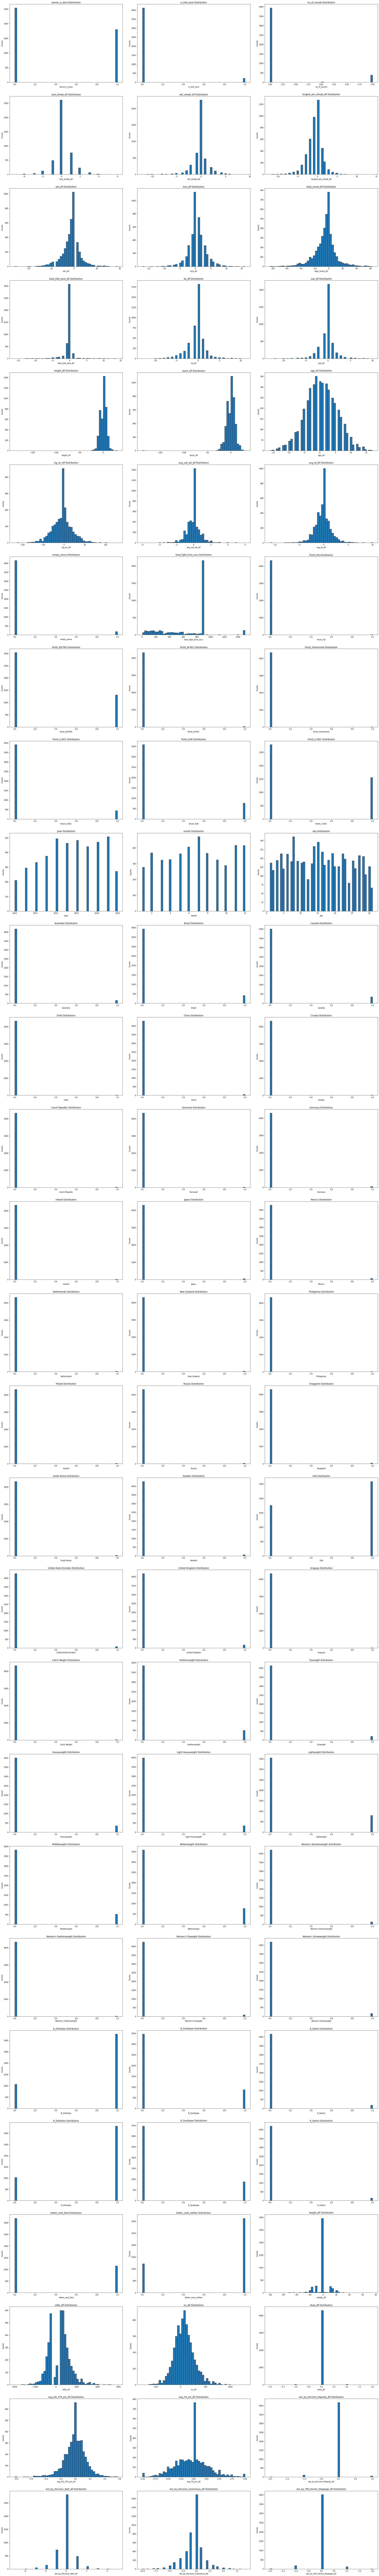

In [82]:
# Visualize the column distributions

# Create 28 row x 3 column subplot grid
fig, ax = plt.subplots(28, 3, figsize = (30, 200))

# Flatten the axes
# Normally the axes are an array [row, col], flattening them just makes it into a single index position (ie. 0, 1, 2)
ax = ax.flat

# Iterate through our columns of interest and enumerate along the way
for i, col in enumerate(df.columns):
    # Plot a histogram
    ax[i].hist(df[col], bins = 50, edgecolor = 'black')
    ax[i].set_title(f'{col} Distribution')
    ax[i].set_ylabel('Counts')
    ax[i].set_xlabel(col)

# Formatting, prevents subplot overlap
fig.tight_layout(pad = 3)
# Show
plt.show()

The distributions look pretty normal overall, with a lot of them having a big peak in the middle of the distribution, which might just be the result of our cleaning or some other factor. The year, month and day columns look fairly uniform which is expected and should not be changed. The only columns that should probably be fixed here are the `height_dif` and the `reach_dif` distributions, kicking out the extreme outliers to the left of the distributions. Other than that, we should scale the data before modelling where applicable (for example Decision Trees do not need it).

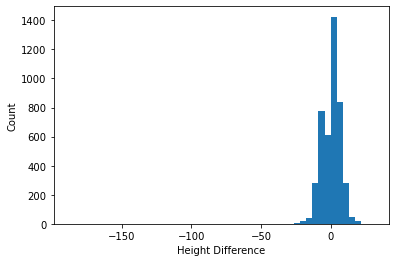

In [83]:
#plot
plt.figure()
plt.hist(df['height_dif'], bins =50)
plt.xlabel('Height Difference')
plt.ylabel('Count')
plt.savefig('height.png')
plt.show()

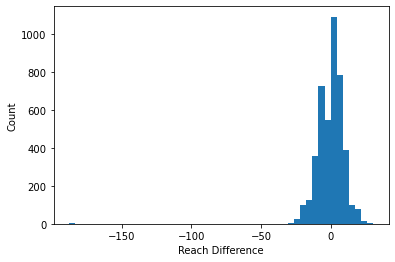

In [84]:
# plot 
plt.figure()
plt.hist(df['reach_dif'], bins =50)
plt.xlabel('Reach Difference')
plt.ylabel('Count')
plt.show()

In [85]:
# conditionally set outliers to median to avoid data loss
df['height_dif'] = df.apply(
    lambda row: df['height_dif'].median() if (row['height_dif'] < -40) else row['height_dif'],
    axis = 1
)
# conditionally set outliers to median to avoid data loss
df['reach_dif'] = df.apply(
    lambda row: df['reach_dif'].median() if (row['reach_dif'] < -40) else row['reach_dif'],
    axis = 1
)

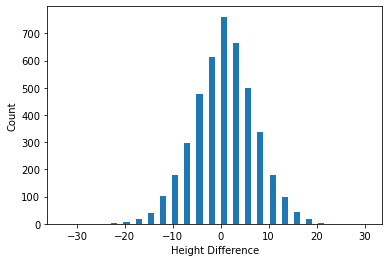

In [86]:
#recheck
plt.figure()
plt.hist(df['height_dif'], bins =50)
plt.xlabel('Height Difference')
plt.ylabel('Count')
plt.savefig('height2.png')
plt.show()

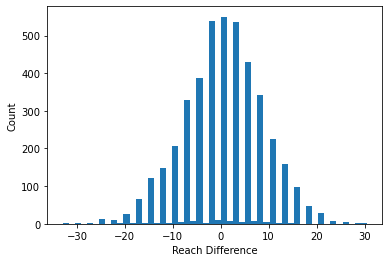

In [87]:
#recheck
plt.figure()
plt.hist(df['reach_dif'], bins =50)
plt.xlabel('Reach Difference')
plt.ylabel('Count')
plt.show()

They are now normal! However, these two variables seem to have a very similar distribution. It would make sense for them to be highly correlated since usually the larger the height difference between two people is, the larger the reach gap will be. Let us examine this hypothesis with all columns and potentially remove some that show very high collinearity.

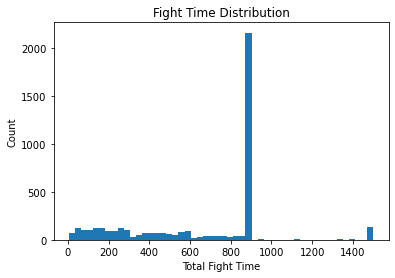

In [95]:
#plot
plt.figure()
plt.hist(df['total_fight_time_secs'], bins =50)
plt.title('Fight Time Distribution')
plt.xlabel('Total Fight Time')
plt.ylabel('Count')
plt.savefig('fighttime.png')
plt.show()

According to the distribution of the fight time, most fights end at the 900s mark. So predicting the time the fight will end is probably not the best idea. You are just better off guessing that it will go to decision and end in the last round if you are not familiar with the fighter. In this case our model has no idea who any of the fighters are so predictions will almost never be valuable.

### Correlation:

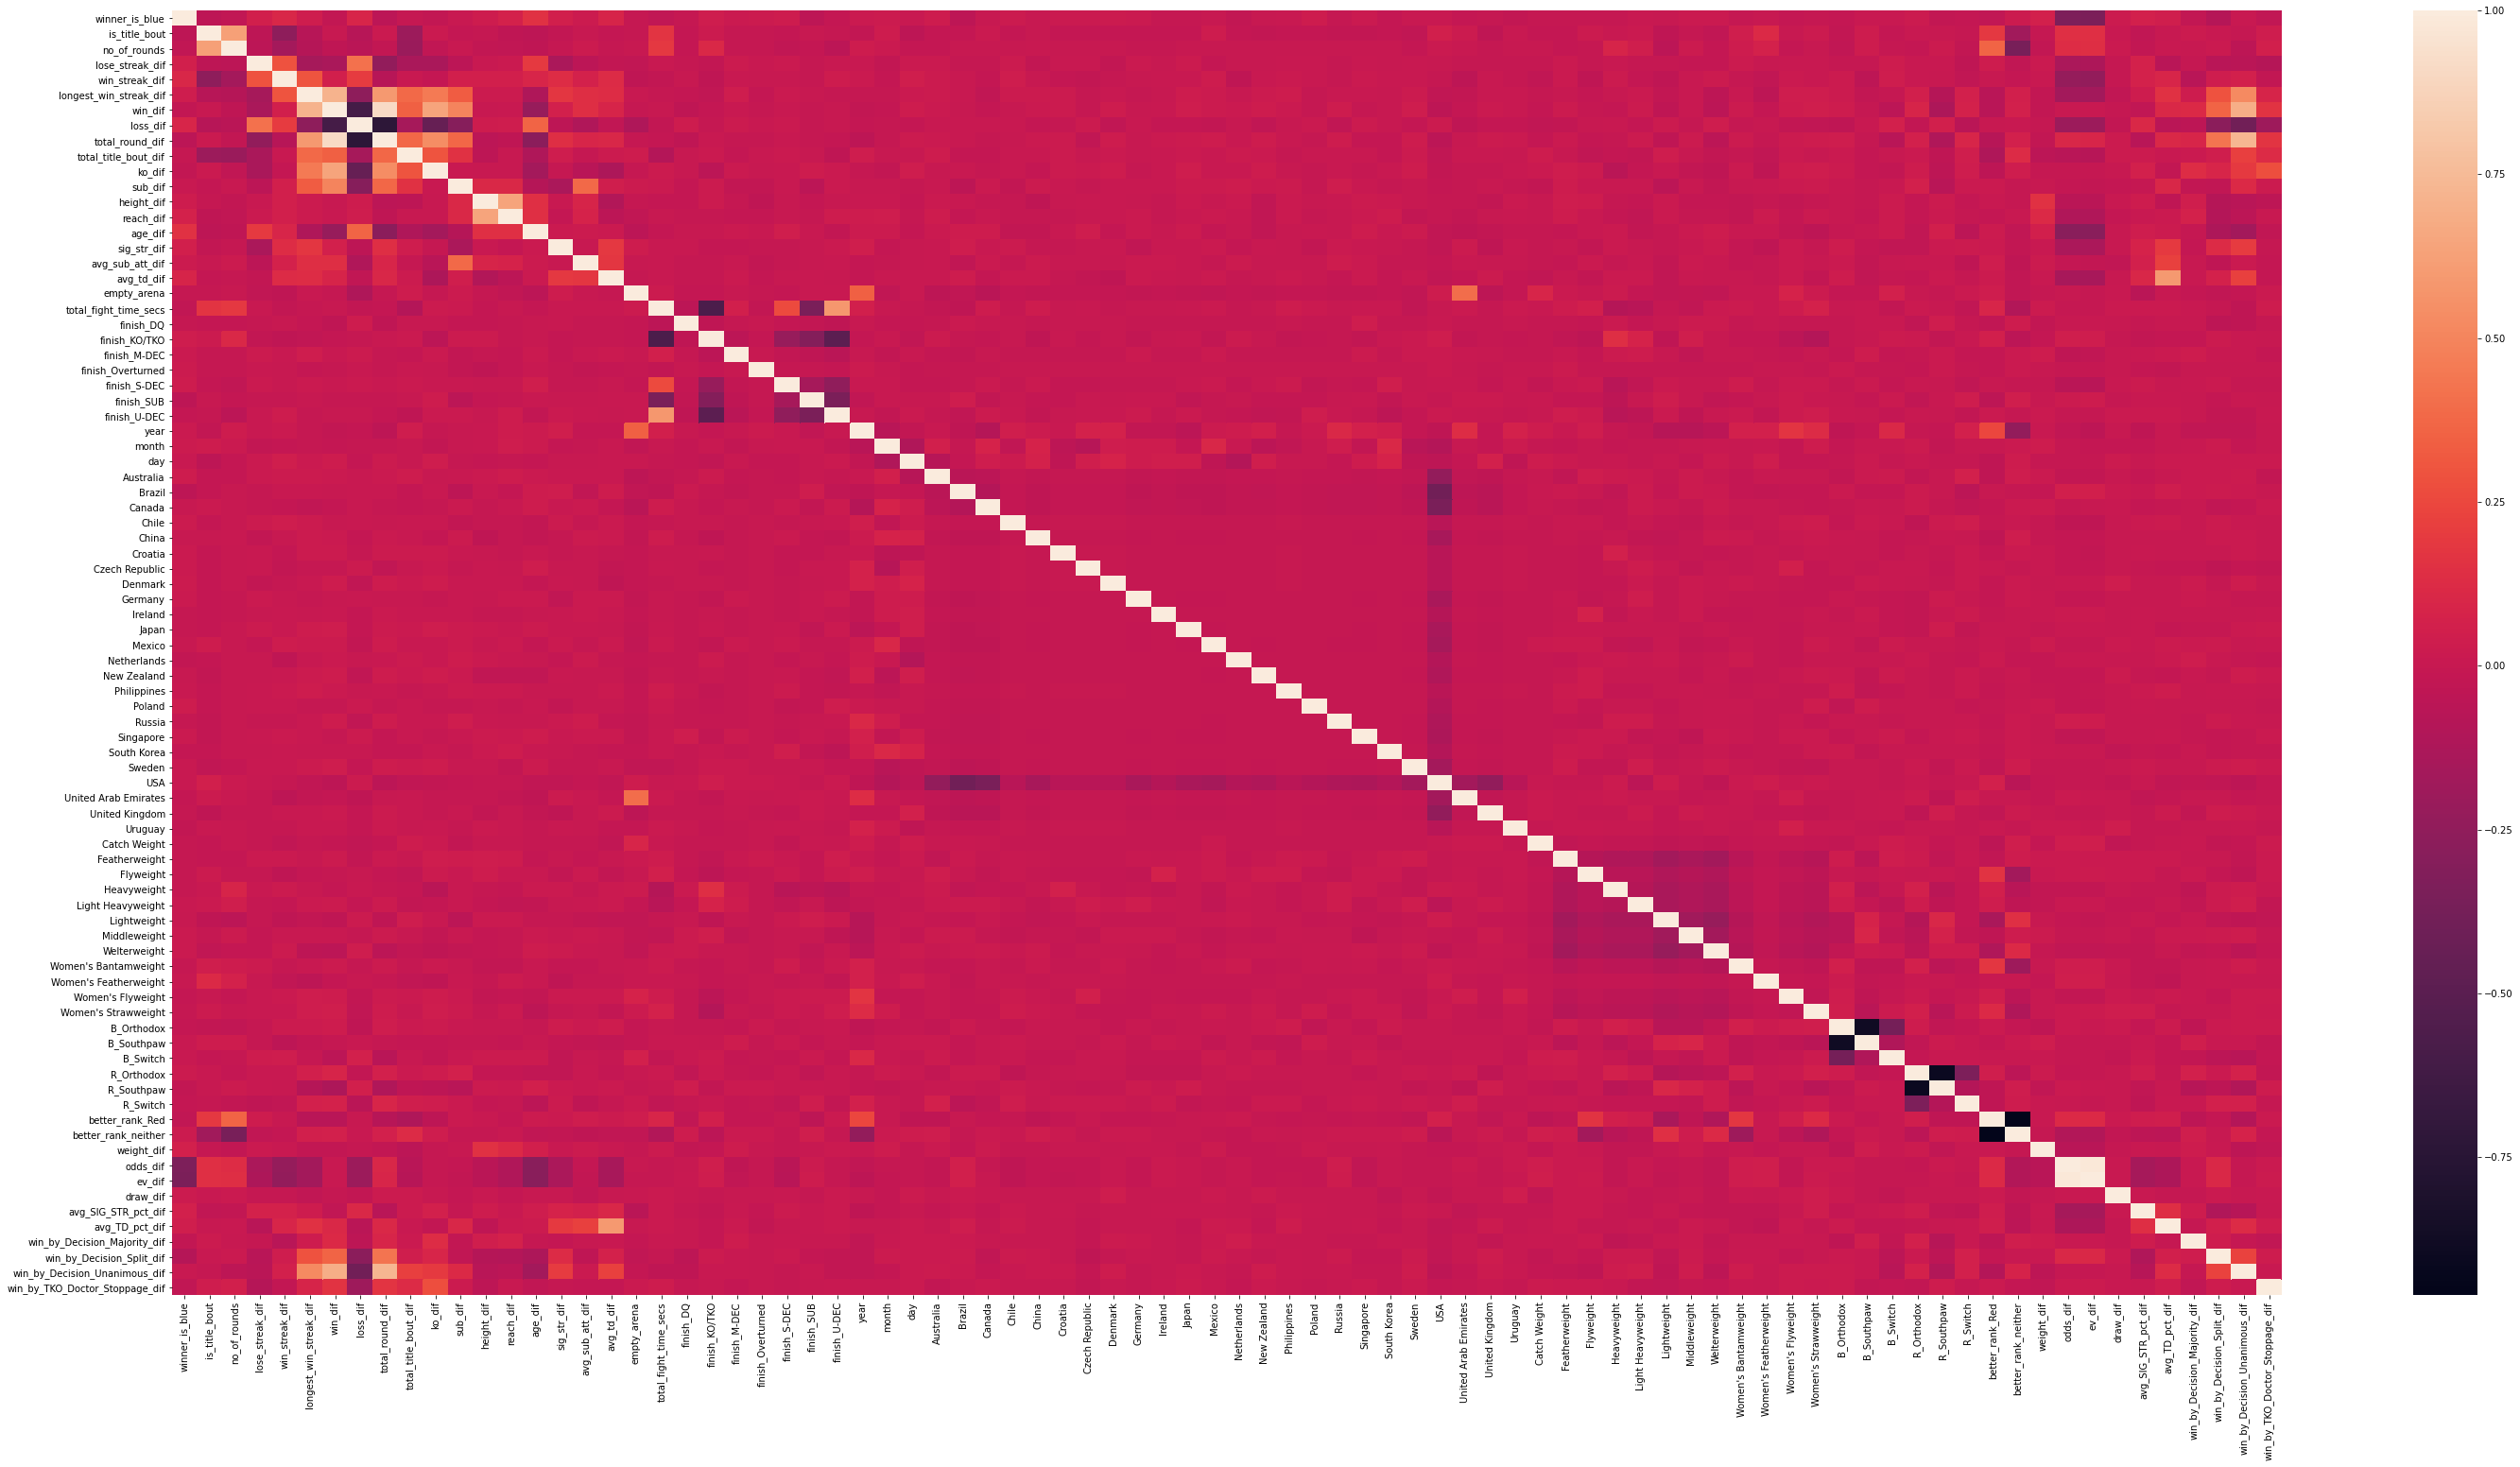

In [88]:
# define our correlations table
corr = df.corr()

#view it as a heatmap
plt.figure(figsize=(50,25))
sns.heatmap(corr)
plt.show()

This heamap shows a lot of promise with our data, with most squares being red, meaning almost no correlation. However, the details cannot be seen. There are definitely a few columns with very high collinearity so lets filter those out for a better understanding.

In [89]:
# unstack the absolute value of the correlations in this dataframe and sort
pd.set_option('display.max_rows', None)
corr.abs().unstack().sort_values(ascending = False)

win_by_TKO_Doctor_Stoppage_dif  win_by_TKO_Doctor_Stoppage_dif    1.000000e+00
Welterweight                    Welterweight                      1.000000e+00
Lightweight                     Lightweight                       1.000000e+00
Light Heavyweight               Light Heavyweight                 1.000000e+00
Heavyweight                     Heavyweight                       1.000000e+00
Flyweight                       Flyweight                         1.000000e+00
Featherweight                   Featherweight                     1.000000e+00
Catch Weight                    Catch Weight                      1.000000e+00
Uruguay                         Uruguay                           1.000000e+00
United Kingdom                  United Kingdom                    1.000000e+00
United Arab Emirates            United Arab Emirates              1.000000e+00
USA                             USA                               1.000000e+00
Sweden                          Sweden              

#### Columns to Drop Based on Correlation (higher than 0.7):
- Since `ev_dif` has a better distribution than `odds_dif`, we can drop `odds_dif`
- Since `better_rank_red` explains who the better rank is lets drop `better_rank_neither`
- Since `win_dif` and `loss_diff` have high correlation with `total_round_dif` lets drop `total_round_dif`
- Drop `R_Orthodox` and `B_Othodox`
- Drop `win_by_Decision_Unanimous_dif` and `longest_win_streak_dif`

Exception:
- I will also drop `no_of_rounds` since normally it should be completely predictable by `is_title_bout`, however for some reason there have been 4-round matches in the past which is very unusual. To avoid noise in the data I would rather drop that column too.

In [90]:
#drop
df.drop(['odds_dif', 'better_rank_neither', 'total_round_dif', 'R_Orthodox', 'B_Orthodox', 
         'win_by_Decision_Unanimous_dif', 'longest_win_streak_dif'],
        axis=1, inplace = True)

In [91]:
#check
df.columns

Index(['winner_is_blue', 'is_title_bout', 'no_of_rounds', 'lose_streak_dif',
       'win_streak_dif', 'win_dif', 'loss_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'empty_arena',
       'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC',
       'finish_Overturned', 'finish_S-DEC', 'finish_SUB', 'finish_U-DEC',
       'year', 'month', 'day', 'Australia', 'Brazil', 'Canada', 'Chile',
       'China', 'Croatia', 'Czech Republic', 'Denmark', 'Germany', 'Ireland',
       'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Philippines',
       'Poland', 'Russia', 'Singapore', 'South Korea', 'Sweden', 'USA',
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Catch Weight',
       'Featherweight', 'Flyweight', 'Heavyweight', 'Light Heavyweight',
       'Lightweight', 'Middleweight', 'Welterweight', 'Women's Bantamweight',
       'Women's Featherweight', 'Women's F

In [92]:
# check value counts of is winner, check the balance
df['winner_is_blue'].value_counts()

0    2541
1    1804
Name: winner_is_blue, dtype: int64

The number of blue fighter winners is lower than the number of red fighter winners. Since we don't have a large dataset it would be best to oversample the blue winners to reduce bias before doing any modelling. We will keep that in mind as we move on with our cleaned data to the modelling notebook. Lets now write our dataframe into the data folder.

In [93]:
# write df into clean_data.csv
df.to_csv('data/clean_data.csv', index = False)